In [134]:
import pandas as pd
import numpy as np

In [135]:
data=pd.read_csv("../Baseball_Data/baseball_ref_data.csv")


In [117]:
#Removing players with fewer than 50 at bats
data=data[data['AB']>75]

#Scaling these columns by PA
columns_to_be_scaled=['R', 'H', '2B', '3B', 'HR', 'RBI','SB', 'CS', 'BB', 'SO', 
                      'IBB', 'HBP', 'SH', 'SF', 'GDP', 'TB']
for j in columns_to_be_scaled:
    data.ix[:,j]=data.ix[:,j]/data.ix[:,'PA']
#Making the index the name of the player
data=data.set_index(data['Name'])
#Removing these columns
remove=['Rk', 'Age', 'Tm', 'Lg', 'G', 'PA', 'AB', 'Pos Summary', 'Name']
for i in remove:
    data.drop(i, axis=1, inplace=True)


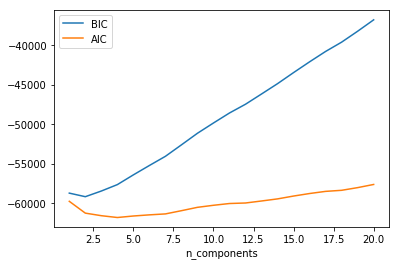

In [118]:
data.fillna(0, inplace=True)
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data)
          for n in n_components]
plt.plot(n_components, [m.bic(data) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');
plt.show()

In [119]:
#Let's use 4 clusters
clustering_model=models[3]
predicted_probs=clustering_model.predict_proba(data).round(3)

In [120]:
predicted_probs=pd.DataFrame(predicted_probs)
predicted_probs=predicted_probs.set_index(data.index)
predicted_probs['Player']=predicted_probs.index

In [143]:
for i in range(len(predicted_probs)-1):
    predicted_probs.iloc[i,4]=predicted_probs.iloc[i,4].split("\\")[1]

In [148]:
predicted_probs=predicted_probs.set_index(predicted_probs['Player'])
predicted_probs.drop('Player', inplace=True, axis=1)

In [151]:
predicted_probs=predicted_probs.drop('LgAvg per 600 PA')